<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span></li><li><span><a href="#Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#Функция-для-создания-профилей-пользователей" data-toc-modified-id="Функция-для-создания-профилей-пользователей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функция для создания профилей пользователей</a></span></li><li><span><a href="#Функция-для-подсчёта-Retention-Rate" data-toc-modified-id="Функция-для-подсчёта-Retention-Rate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Функция для подсчёта Retention Rate</a></span></li><li><span><a href="#Функция-для-подсчёта-конверсии" data-toc-modified-id="Функция-для-подсчёта-конверсии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Функция для подсчёта конверсии</a></span></li><li><span><a href="#Функция-для-подсчёта-LTV" data-toc-modified-id="Функция-для-подсчёта-LTV-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Функция для подсчёта LTV</a></span></li><li><span><a href="#Функция-для-сглаживания-данных" data-toc-modified-id="Функция-для-сглаживания-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Функция для сглаживания данных</a></span></li><li><span><a href="#Функция-для-построения-графика-Retention-Rate" data-toc-modified-id="Функция-для-построения-графика-Retention-Rate-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Функция для построения графика Retention Rate</a></span></li><li><span><a href="#Функция-для-построения-графика-конверсии" data-toc-modified-id="Функция-для-построения-графика-конверсии-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Функция для построения графика конверсии</a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Функция для визуализации LTV и ROI</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы</a></span></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

# Анализ маркетинговых показателей

**Цель исследования**

Изучить:
 - откуда приходят пользователи и какими устройствами они пользуются;
 - сколько стоит привлечение пользователей из различных рекламных каналов;
 - сколько денег приносит каждый клиент;
 - когда расходы на привлечение клиента окупаются;
 - какие факторы мешают привлечению клиентов.

**План работы**

1. Выгрузить и предобработать данные
2. Написать функции для расчета показателей
3. Провести исследовательский анализ
4. Сделать общий вывод

Входные данные - *3 датасета с информацией о логах серверов, информацией о заказах и расходах на рекламу.*

### Загрузка данных

In [ ]:
# импортируем все необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [ ]:
# сохраняем датасеты в переменные и выводим

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    print('visits error')
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    print('orders error')

try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    print('costs error')

display(visits.head(10))
display(orders.head(10))
display(costs.head(10))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [ ]:
# смотрим общую информацию

print(visits.info())
print(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

In [ ]:
# приводим столбцы к общему виду

visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map (str.lower, costs.columns)

visits = visits.rename(
    columns={
        'user id': 'user_id',
        'session start': 'session_start',
        'session end': 'session_end'
    }
)
orders = orders.rename(
    columns={
        'user id': 'user_id',
        'event dt': 'event_dt'
    }
)

print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [ ]:
# проверяем наличие дубликатов

print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [ ]:
# преобразовываем столбцы

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

**Вывод**

Привели названия колонок во всех датафреймах к корректному виду, преобразовали столбцы с датами в необходимую для анализа форму. Пропусков и дубликатов в данных нет.

### Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии

#### Функция для создания профилей пользователей

In [ ]:
# функция для создания профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчёта Retention Rate

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта конверсии

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта LTV

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания данных

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### Функция для построения графика Retention Rate

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### Функция для построения графика конверсии

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод**

Написали необходимые функции для подсчета показателей и построения графиков.

### Исследовательский анализ данных

In [ ]:
# применяем функцию профилей

profiles = get_profiles(visits, orders, costs)

display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [ ]:
# определяем минимальную и максимальную даты

min_observation_date = profiles['dt'].min()
max_observation_date = profiles['dt'].max()
observation_date = datetime(2019, 11, 1).date()

print(min_observation_date)
print(max_observation_date)

2019-05-01 00:00:00
2019-11-01


**Вывод**

Минимальная дата совершения операции в датафрейме - 01.05.2019, последняя - 27.10.2019

In [ ]:
# считаем процент пользователей, совершивших покупку по регионам

region = (profiles.groupby('region')
                 .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
                 .sort_values(by='region', ascending=False)
         )

region.columns=['unique_users', 'sum', 'mean']

#
region = region.sort_values(by='mean', ascending=False)

#
region['mean'] = region['mean'].transform(lambda x: '{:,.2%}'.format(x))

print(region)

               unique_users   sum   mean
region                                  
United States        100002  6902  6.90%
Germany               14981   616  4.11%
UK                    17575   700  3.98%
France                17450   663  3.80%


**Вывод**

Наибольший процент платящих пользователей из США.

In [ ]:
# считаем процент пользователей, совершивших покупку по девайсам

device = (profiles.groupby('device')
                 .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
         )

device.columns=['unique_users', 'sum', 'mean']

device = device.sort_values(by='mean', ascending=False)

device['mean'] = device['mean'].transform(lambda x: '{:,.2%}'.format(x))

print(device)

         unique_users   sum   mean
device                            
Mac             30042  1912  6.36%
iPhone          54479  3382  6.21%
Android         35032  2050  5.85%
PC              30455  1537  5.05%


**Вывод**

Пользователи на платформе Mac по соотношению уникальных и совершивших больше всего.

In [ ]:
# считаем процент пользователей, совершивших покупку по источникам

channel = (profiles.groupby('channel')
                 .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
          )

channel.columns=['unique_users', 'sum', 'mean']

channel = channel.sort_values(by='mean', ascending=False)

channel['mean'] = channel['mean'].transform(lambda x: '{:,.2%}'.format(x))

print(channel)

                    unique_users   sum    mean
channel                                       
FaceBoom                   29144  3557  12.20%
AdNonSense                  3880   440  11.34%
lambdaMediaAds              2149   225  10.47%
TipTop                     19561  1878   9.60%
RocketSuperAds              4448   352   7.91%
WahooNetBanner              8553   453   5.30%
YRabbit                     4312   165   3.83%
MediaTornado                4364   156   3.57%
LeapBob                     8553   262   3.06%
OppleCreativeMedia          8605   233   2.71%
organic                    56439  1160   2.06%


**Вывод**

Топ 3 каналов рекламы в соотношении привлечённых и тех, кто совершил дальнейшую покупку: FaceBoom, AdNonSense и lambdaMediaAds.

### Маркетинговые расчёты

In [ ]:
# считаем общую сумму затрат

sum_costs = costs['costs'].sum()

print(f'Общая сумма расходов на маркетинг {sum_costs}')

Общая сумма расходов на маркетинг 105497.30000000002


,channel,sum,percentage
0,TipTop,54751.30,51.90%
1,FaceBoom,32445.60,30.75%
2,WahooNetBanner,5151.00,4.88%
3,AdNonSense,3911.25,3.71%
4,OppleCreativeMedia,2151.25,2.04%
5,RocketSuperAds,1833.00,1.74%
6,LeapBob,1797.60,1.70%
7,lambdaMediaAds,1557.60,1.48%
8,MediaTornado,954.48,0.90%
9,YRabbit,944.22,0.90%


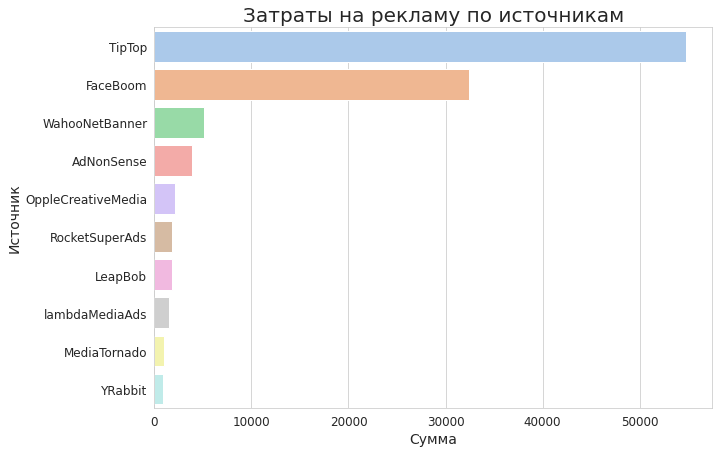

In [ ]:
# общая сумма затрат по источникам

channel_costs = costs.groupby('channel')\
                     .agg({'costs': 'sum'})\
                     .rename(columns={'costs': 'sum'})\
                     .sort_values(by='sum', ascending=False)\
                     .reset_index()

channel_costs['percentage'] = channel_costs['sum'] / channel_costs['sum'].sum()
channel_costs['percentage'] = channel_costs['percentage'].transform(lambda x: '{:,.2%}'.format(x))

display(channel_costs)

# строим график

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

sns.barplot(data=channel_costs,
            x='sum',
            y='channel',
            orient='h',
            palette='pastel')
plt.title('Затраты на рекламу по источникам', size=20)
plt.xlabel('Сумма', size=14)
plt.ylabel('Источник', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Лидерами по сумме затрат на рекламу по каналам являются TipTop и FaceBoom

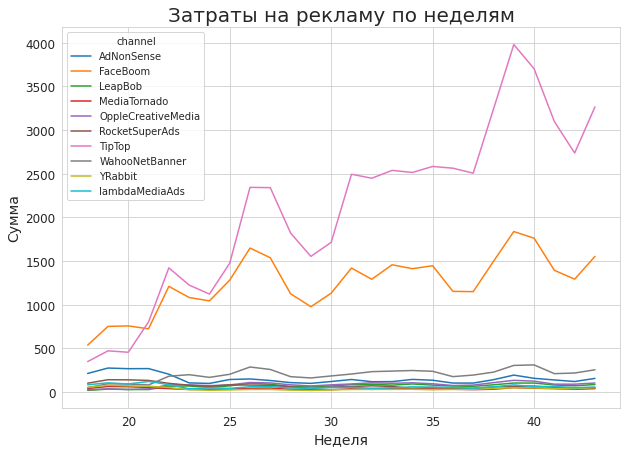

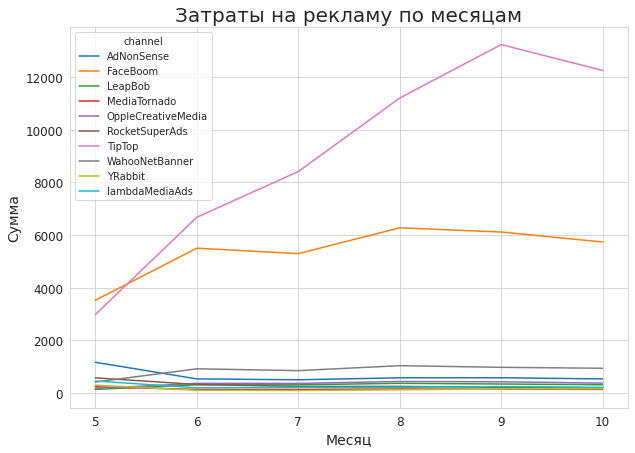

In [ ]:
# добавляем столбцы с неделями и месяцами

costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

# сводная таблица

pivot = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')\
             .plot(figsize=(10, 7),
                   grid=True,
                   legend=True)
plt.title('Затраты на рекламу по неделям', size=20)
plt.xlabel('Неделя', size=14)
plt.ylabel('Сумма', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

# график

pivot2 = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')\
             .plot(figsize=(10, 7),
                   grid=True,
                   legend=True)
plt.title('Затраты на рекламу по месяцам', size=20)
plt.xlabel('Месяц', size=14)
plt.ylabel('Сумма', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Пик затрат приходится на сентябрь, в основном размещают рекламу на канале с названием "AdNonSense", затраты на канал "FaceBoom" так же растут, но в меньшей степени. Остальные источники почти не изменяются со временем.

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


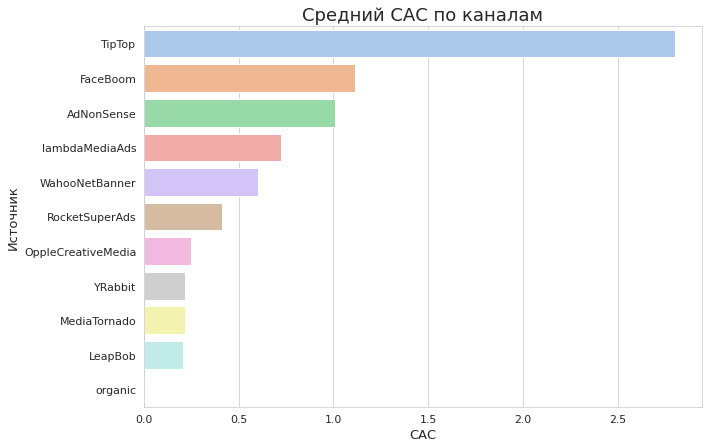

In [ ]:
# сводная таблица

cac_channel = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')\
                      .sort_values(by='acquisition_cost', ascending=False)\
                      .reset_index()

display(cac_channel)

# график

plt.figure(figsize=(10, 7))

sns.barplot(data=cac_channel,
            x='acquisition_cost',
            y='channel',
            orient='h',
            palette='pastel')
plt.title('Средний САС по каналам', size=18)
plt.xlabel('САС', size=13)
plt.ylabel('Источник', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

plt.show()

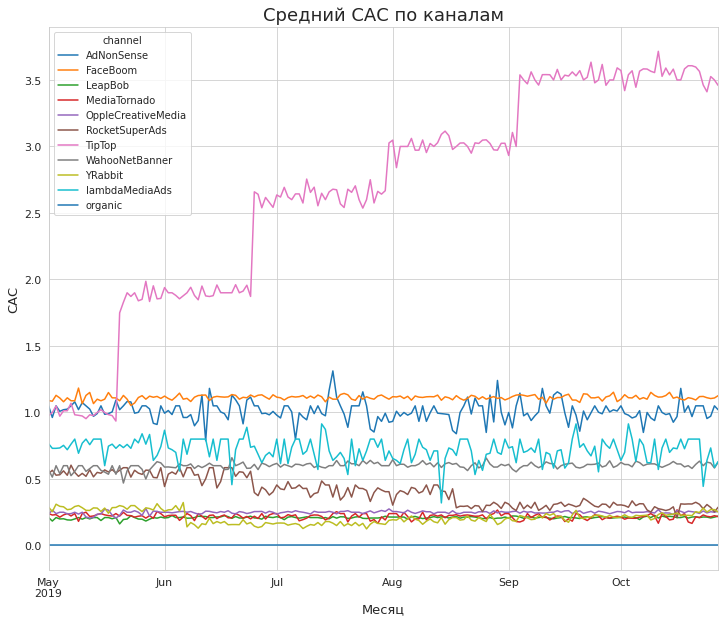

In [ ]:
# сводная таблица и график

cac_channel_dt = profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')\
                         .plot(grid=True, figsize=(12, 10))

plt.title('Средний САС по каналам', size=18)
plt.xlabel('Месяц', size=13)
plt.ylabel('САС', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

plt.show()

In [ ]:
# средний САС по всем источникам

cac_mean = profiles.query('channel != "organic"').agg({'acquisition_cost': 'mean'})
cac_mean

acquisition_cost    1.127481
dtype: float64

**Вывод**

Средний САС для всех источников, кроме organic - 1.12. Самый большой САС у "TipTop", он рос почти каждый месяц, у остальных источников на протяжении всего периода показатель был примерно одинаковый.

### Оценка окупаемости рекламы

In [ ]:
# горизонт анализа

horizon_days = 14

# исключение органических пользователей из таблицы

profiles = profiles.query('channel != "organic"')

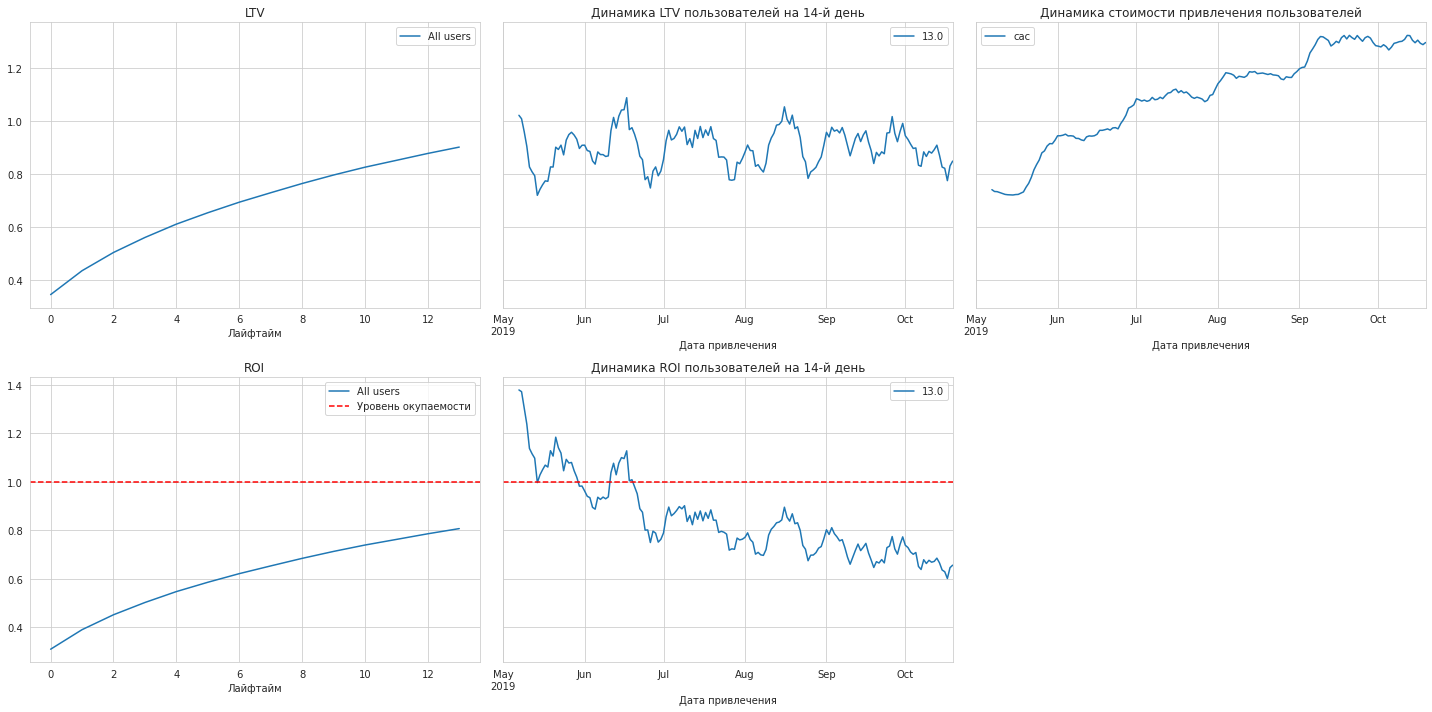

In [ ]:
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод**

Реклама не окупается, динамика стоимости привлечения пользователей растёт, а динамика ROI снижается. LTV постоянно растёт, динамика имеет небольшие колебания, но в среднем не изменяется, значит сезонности нет.

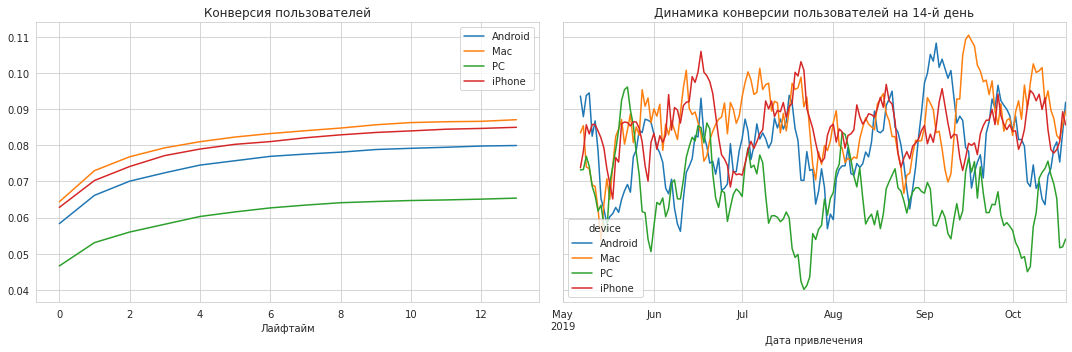

In [ ]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

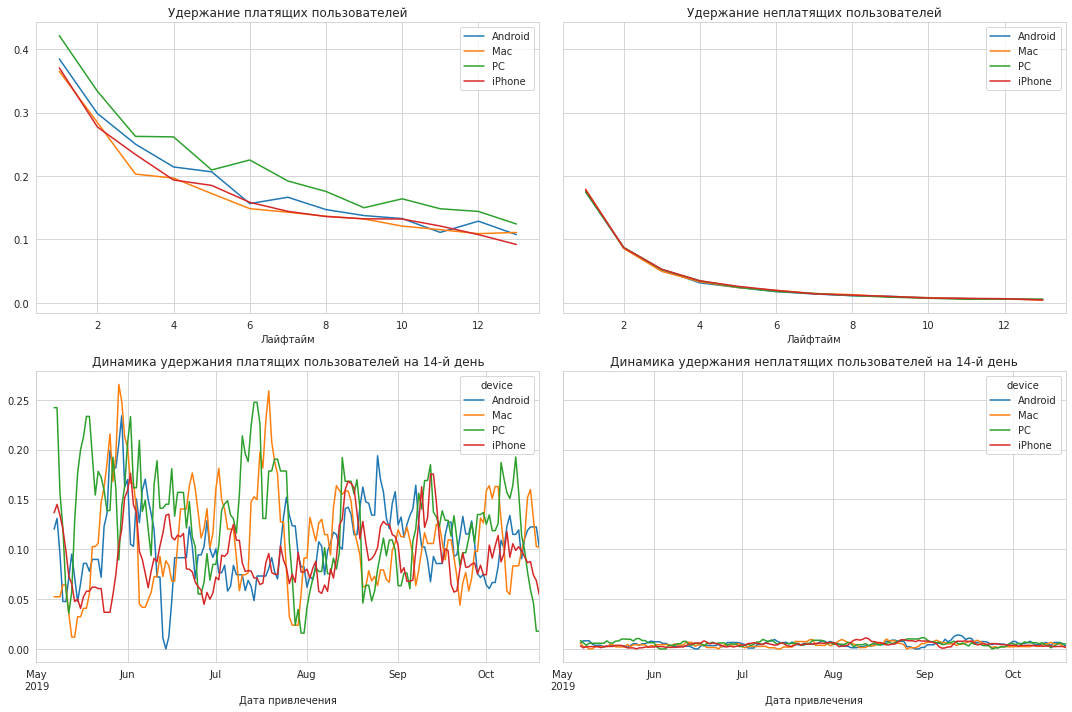

In [ ]:
# смотрим удержание с разбивкой по девайсам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

Лучше всего конвертируются пользователи Mac, хуже всего - пользователи ПК. Удерживаются лучше те, кто на ПК.

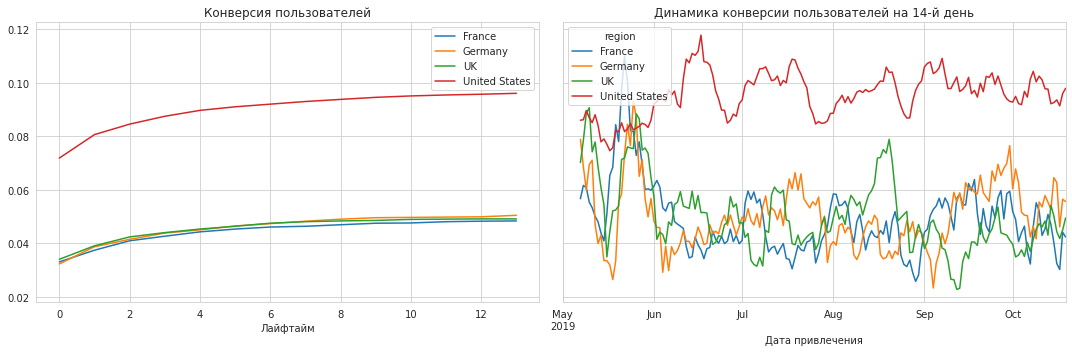

In [ ]:
# смотрим конверсию с разбивкой по регионам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

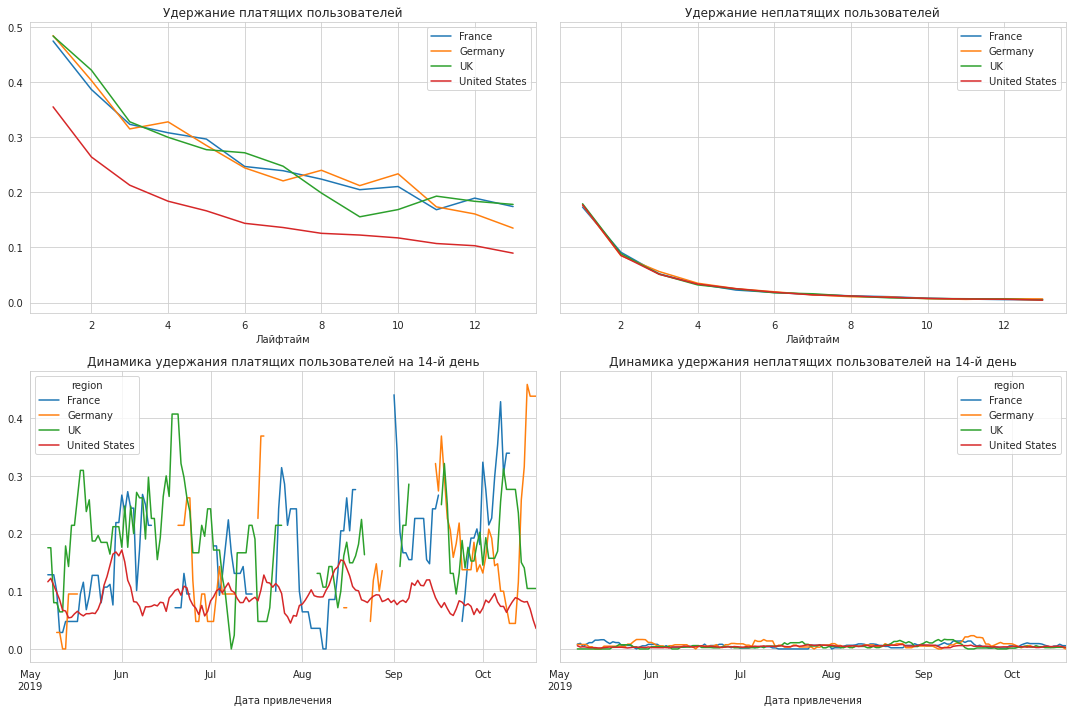

In [ ]:
# смотрим удержание с разбивкой по регионам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

Конверсия США выше остальных более чем в 2 раза, но удержание у этих пользователей самое низкое.

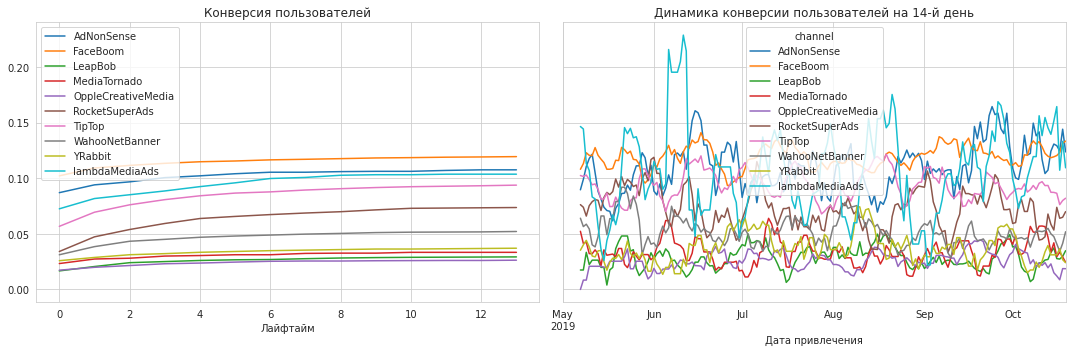

In [ ]:
# смотрим конверсию с разбивкой по источникам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

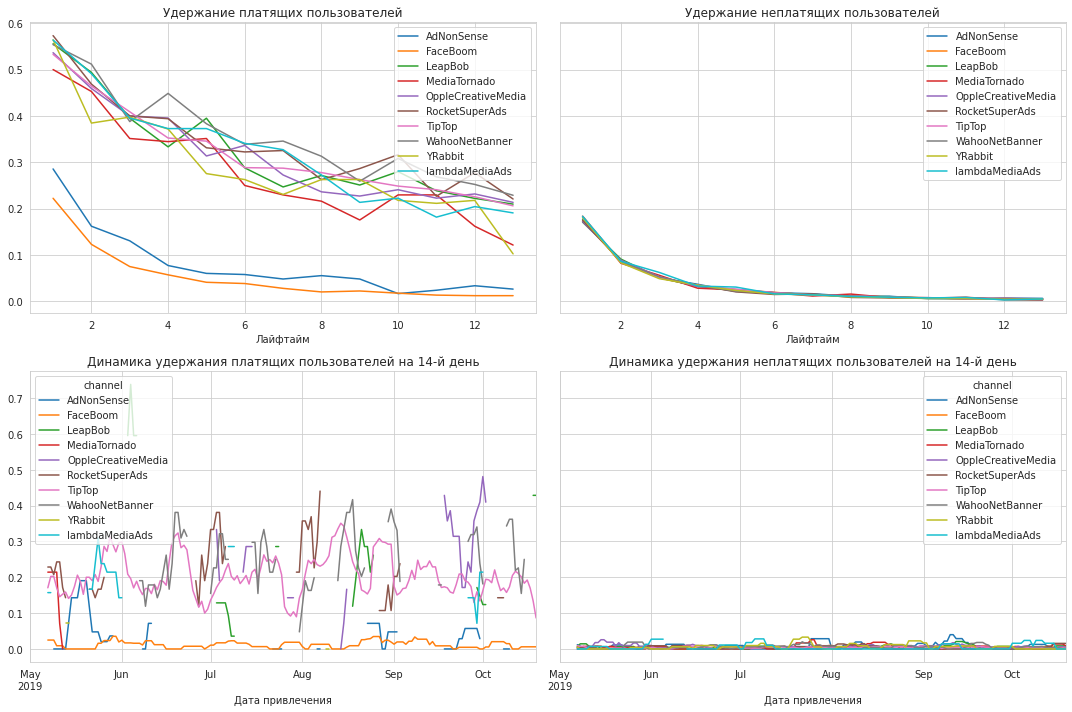

In [ ]:
# смотрим удержание с разбивкой по источникам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

Источники FaceBoom и AdNonSense имеют самые высокую конверсию и при этом хуже остальных удерживаются.

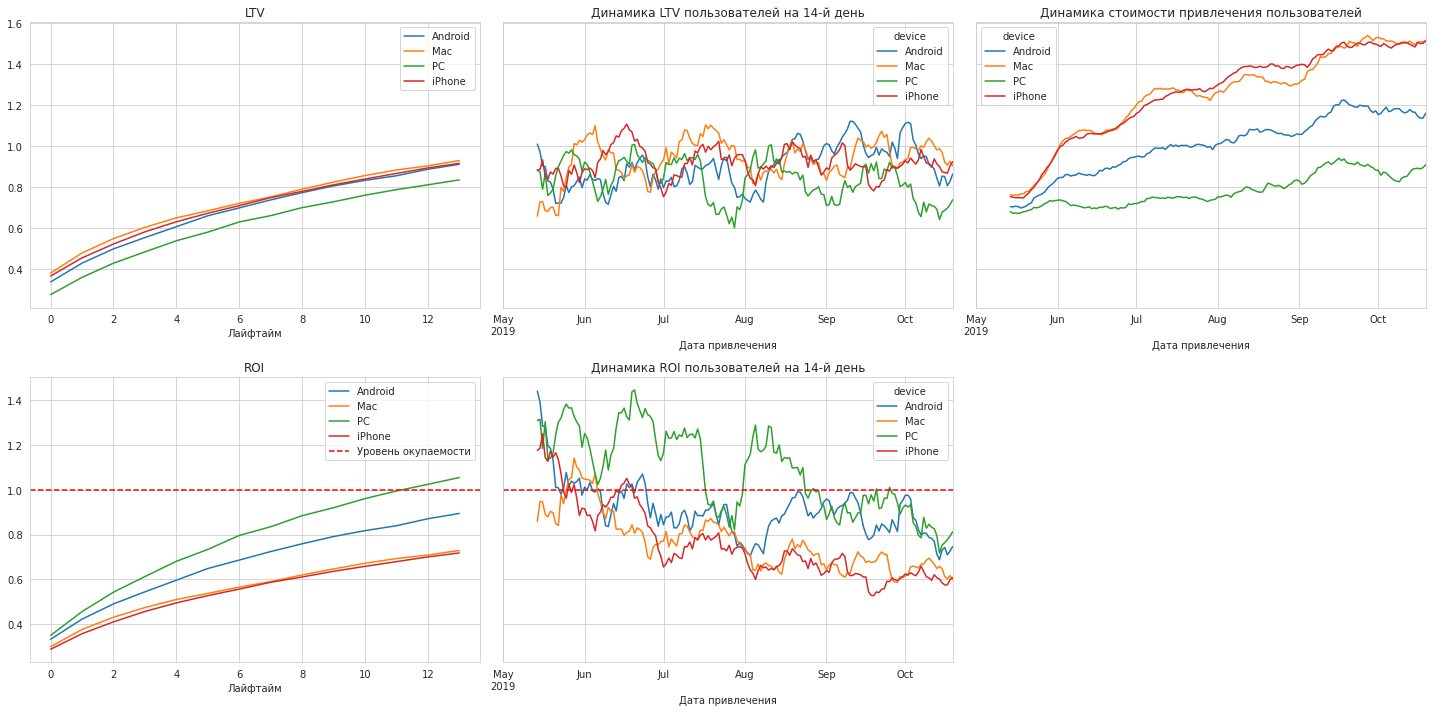

In [ ]:
# смотрим окупаемость с разбивкой по девайсам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Пользователи ПК окупились начали окупаться, начиная с 11 недели. Затраты на этот источник были меньше всего, но и платят клиенты с компьютеров меньше остальных. Динамика LTV остальных устройств схожа друг с другом, затраты увеличиваются постепенно, особенно на Mac и iPhone, по динамике ROI бОльшую часть периода девайсы находились ниже уровня безубыточности.

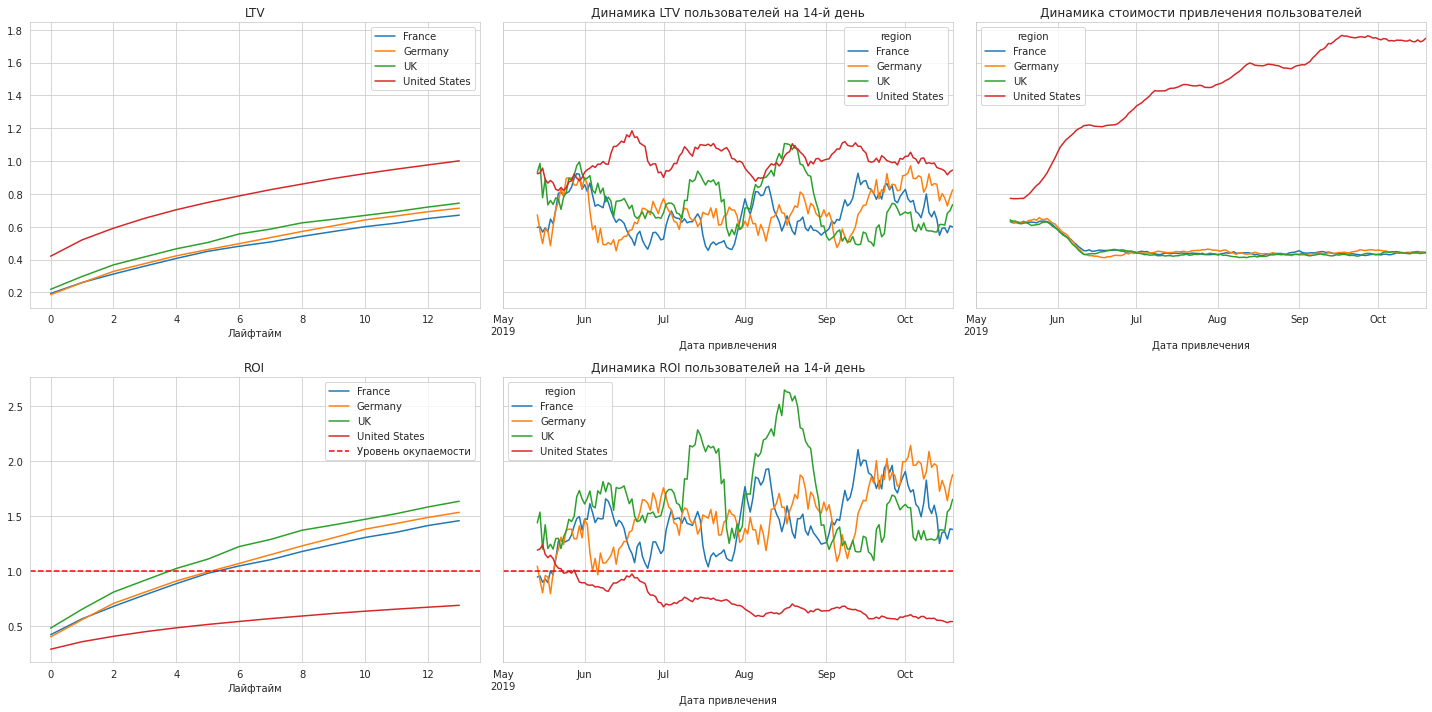

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Ценность пользователи из США более чем на 0.2 выше других. Динамика LTV всё так же сезонна. Самые высокие затраты, которые постоянно растут, идут на пользователей из США, на другие страны затраты находятся примерно на одном уровне. США - единственная страна, которая не окупилась, на графике ROI и динамике ROI видно, что только она находится ниже уровня окупаемости, что скорее всего связано с большими затратами.

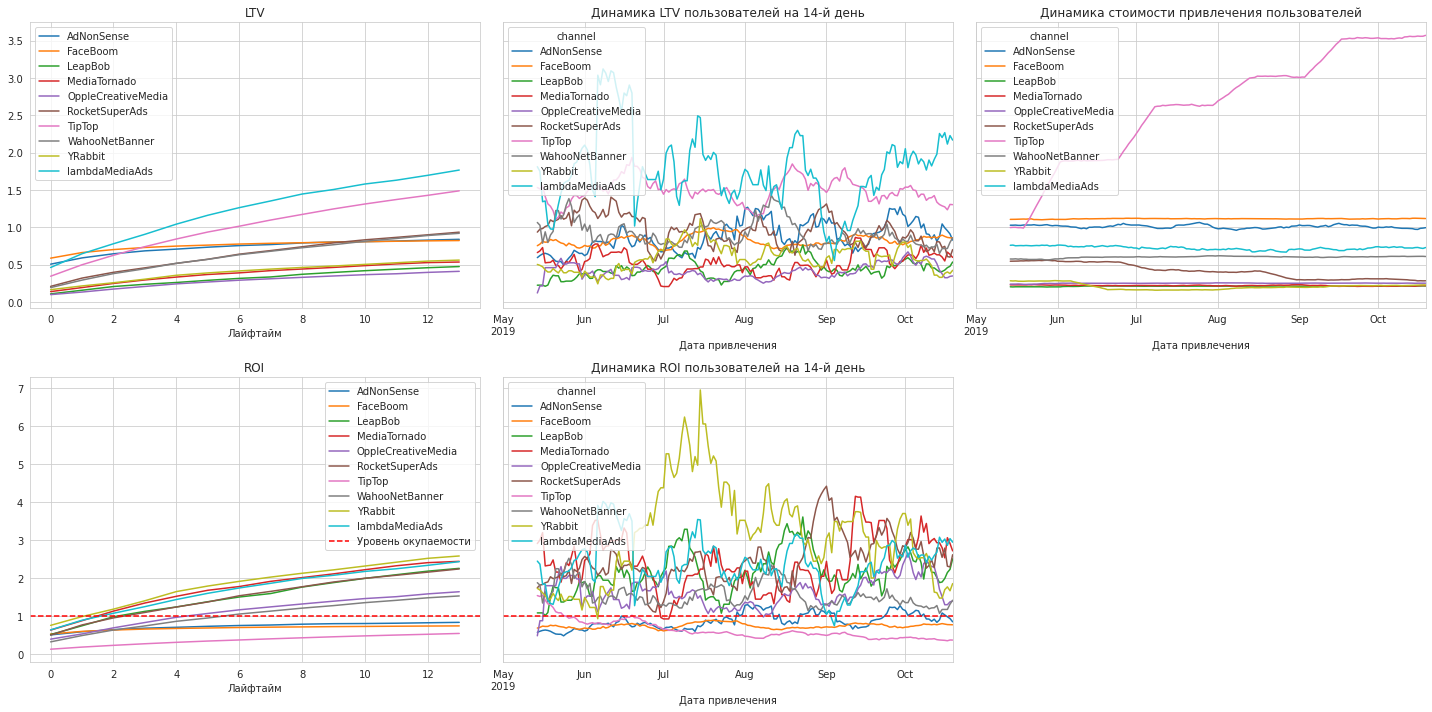

In [ ]:
# смотрим окупаемость с разбивкой по источникам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Только 3 источника не окупились, один из них - TipTop, на него было больше всего затрат, остальные же получали по-разному, но затраты не увеличивались и не уменьшались. Достаточно много каналов окупилось, особенно можно выделить YRabbit, у которого была самая высокая динамика ROI в середине июля. Также, окупились LeapBob, MediaTornado, OppleCreativeMedia и другие.

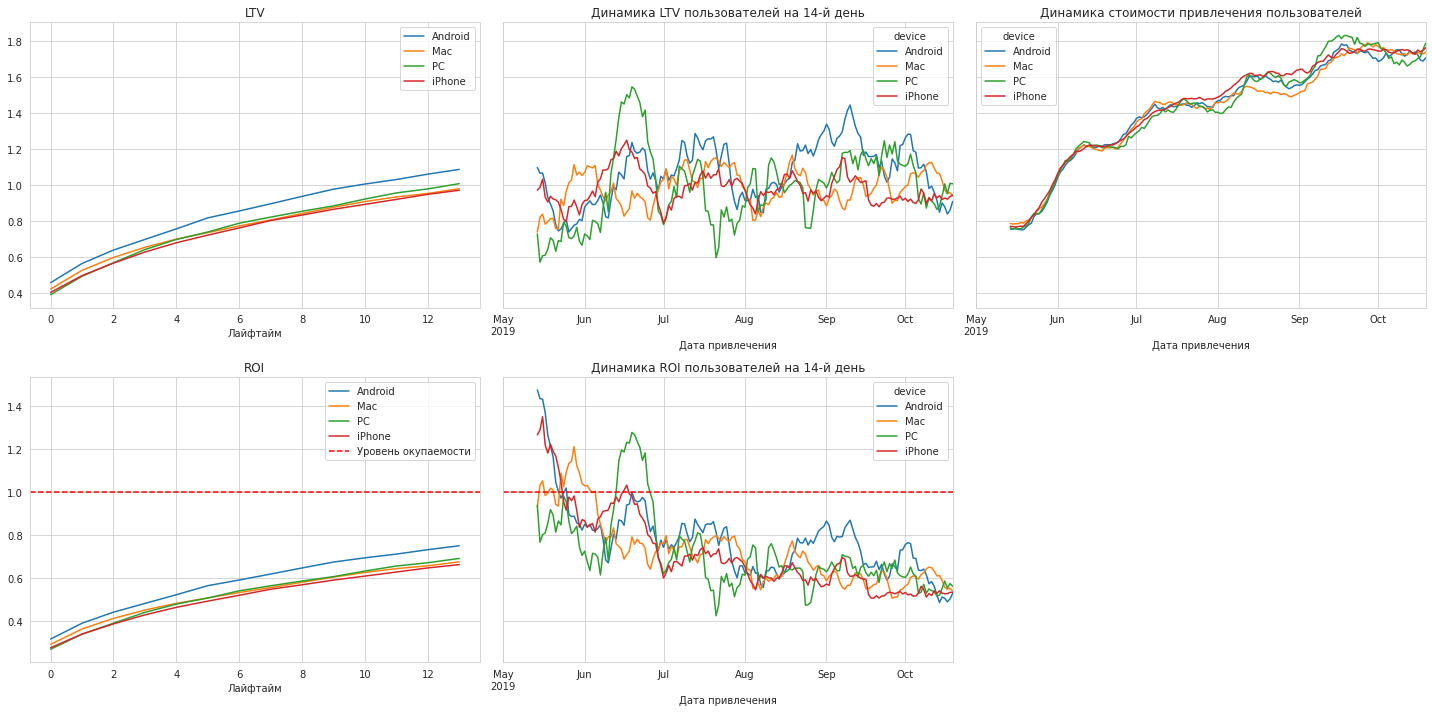

In [ ]:
# смотрим окупаемость с разбивкой по девайсам в США

profiles_US = profiles.query('region == "United States"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Динамика по устройствам в США примерно одинаковая, ни одно из устройств не окупилось.

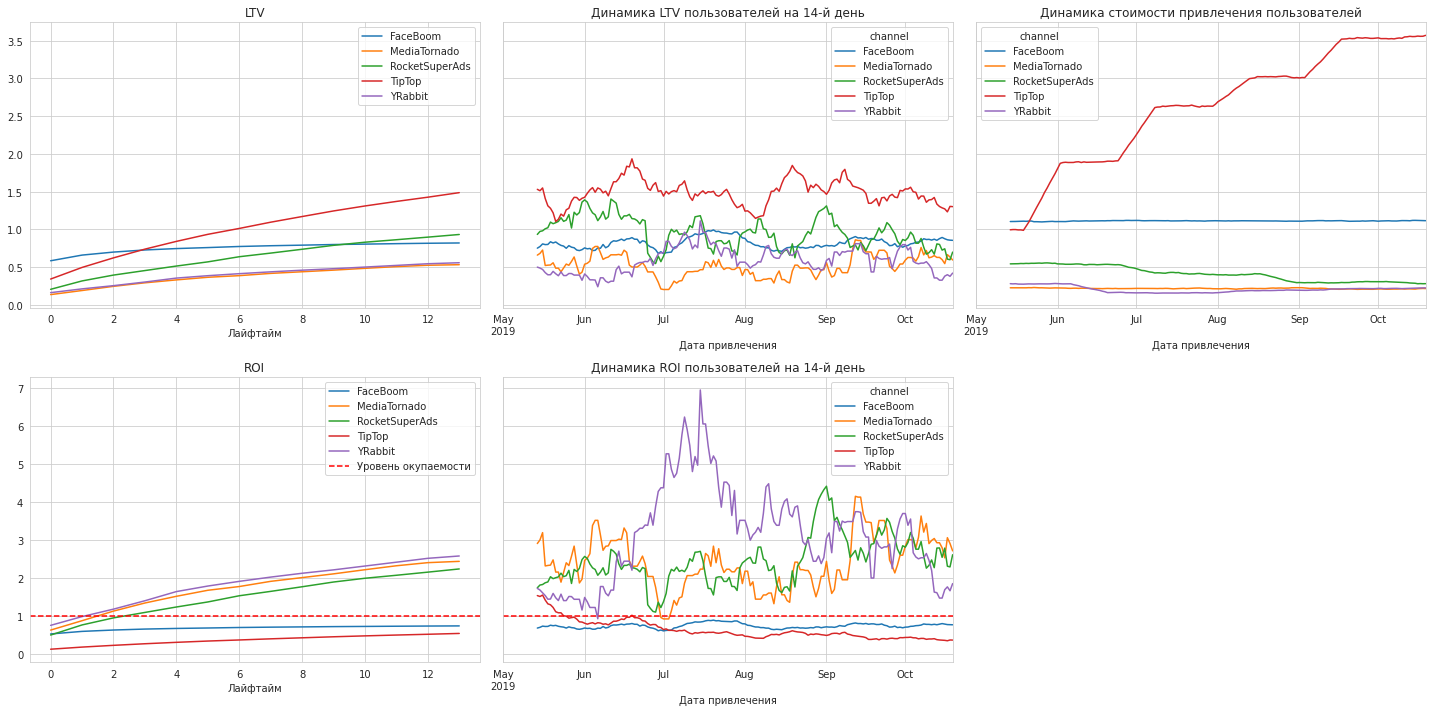

In [ ]:
# смотрим окупаемость с разбивкой по источникам в США

profiles_US = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Проблемными каналами являются TipTop и FaceBoom, поскольку только они не окупились, на TipTop по-прежнему идут самые большие затраты.

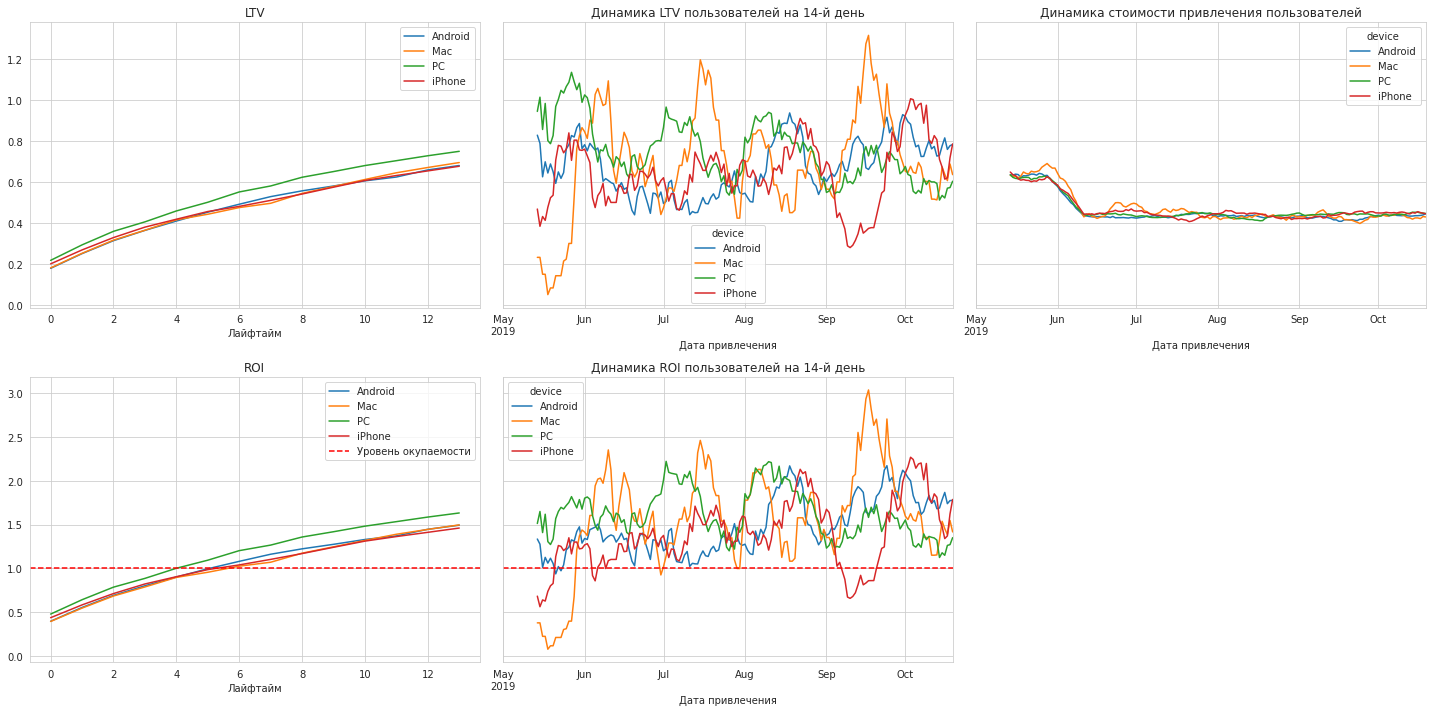

In [ ]:
# смотрим окупаемость с разбивкой по девайсам в Европе

profiles_EU = profiles.query('region != "United States"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_EU, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Динамика САС примерно одинаковая и со временем она упала. Все девайсы окупились, ПК занимает лидирующее место.

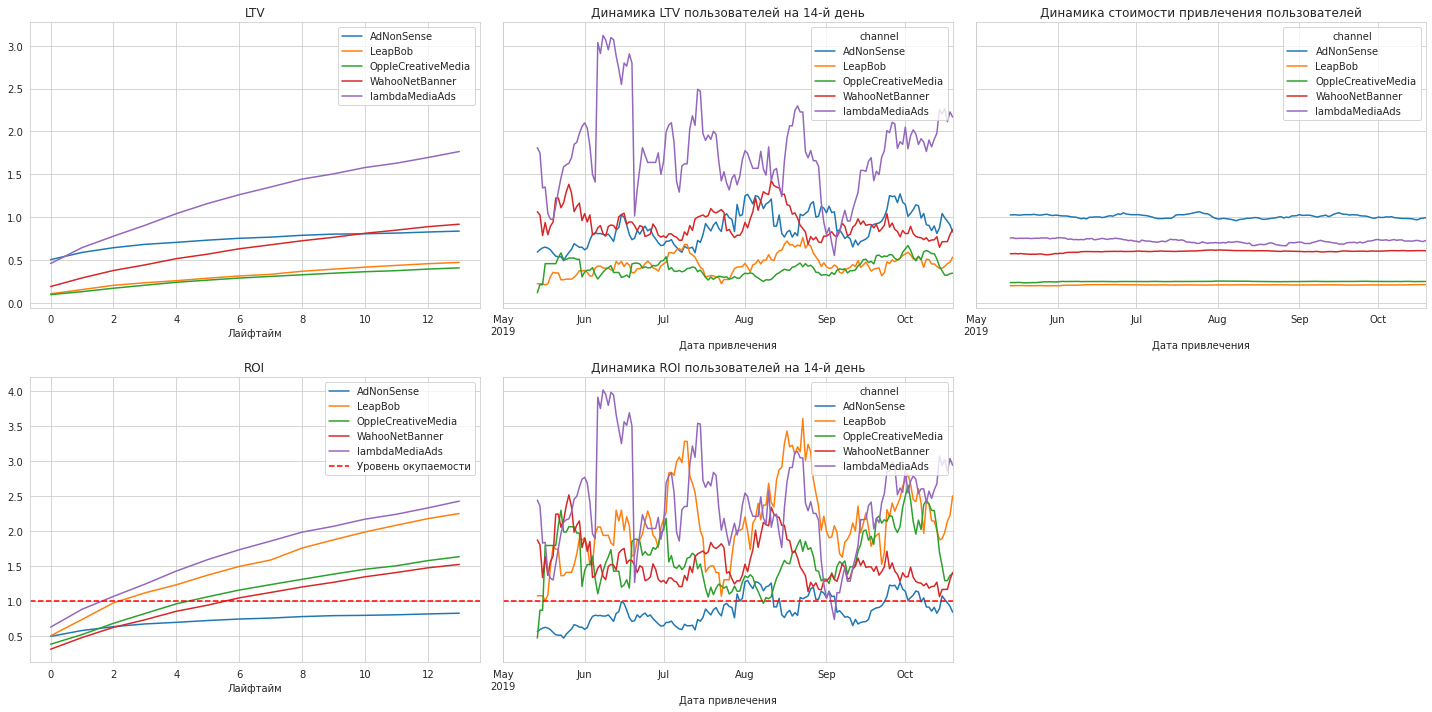

In [ ]:
# смотрим окупаемость с разбивкой по источникам в Европе

profiles_EU = profiles.query('region != "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_EU, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Стоимость привлечения практически не менялась со временем. Не окупился только 1 источник - AdNonSense.

**Вывод**

Исходя из графиков, можно сделать вывод, что ROI за весь период не окупился, расходы на рекламу постоянно растут.

Окупились только пользователи ПК, но в динамике на конец периода все девыйсы были ниже уровня безубыточности.

Среди стран не окупилась только США, на неё были самые большие затраты, которые росли каждый месяц.

Из каналов убыточными стали 3, один из которых - TipTop, расходы на которые были больше остальных и росли каждый месяц, на другие источники затраты почти не менялись.

# Общий вывод

Задачей проекты было разобраться в причинах и помочь компании Procrastinate Pro+ выйти в плюс.

Этапы исследования:
1. Открытие и изучение датасета
2. Предобработка данных
 - Привели колонки в общему виду
 - Проверили наличие дубликатов
 - Преобразовали столбцы
3. Исследовательский анализ
4. Маркетинговый анализ
5. Оценка окупаемости рекламы

**В ходе анализа были сделаны следующие выводы:**

Больше всего пользователей на платформе из США, платящих тоже. Среди девайсов лидером является iPhone, меньше всего на PC и Mac. Самые расходные каналы привлечения - TipTop и FaceBoom.

Средний САС для всех источников, кроме органического, составляет примерно 1,12.

Реклама для привлечения новых пользователей не окупилась, причиной тому стали постоянно растущие расходы на рекламу. Это и является причиной убытков компании.

Для оптимизации расходов компании необходимо урезать бюджетирование источника TipTop и пользователей из США. В эти 2 пункта было выделено наибольшее количество денег, которое росло с каждым месяцам, но по итогу они не окупились.

Компании стоит присмотреться на финансирование Европейских регионов, а так же источники привлечения, среди которых LeapBob, OppleCreativeMedia, WahooNetBanner (Европа) и YRabbit, MediaTornado, RocketSuperAds (Америка). Если говорить про девайсы, то менеджерам компании надо присмотреться к пользователям Mac и iPhone, поскольку на них идут самые большие траты и при этом у них самый низкий ROI, также, проработать конвертацию пользователей ПК, потому что у них самые низкие затраты и самый высокий ROI. Если в разбивке по регионам, то финансирование нужно сократить именно в США, потому что в Европе траты не растут, а ROI увеличивается.